# Classify IMDB Review with Recurrent Neural Network

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To obtain the same results for each run, use random seeds in the keras and make the tensorflow operation decisive.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## IMDB Review Dataset

In [3]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

17464789/17464789 [==============================] - 2s 0us/step


In [4]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [5]:
print(len(train_input[0]))

218


In [6]:
print(len(train_input[1]))

189


In [7]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [8]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [9]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [10]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [11]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


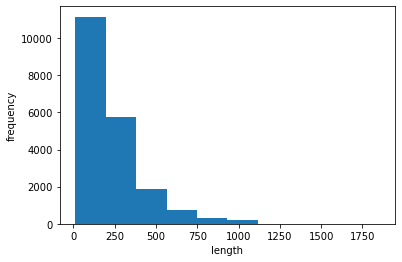

In [12]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [14]:
print(train_seq.shape)

(20000, 100)


In [15]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [16]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [17]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [18]:
val_seq = pad_sequences(val_input, maxlen=100)

## Create Recurrent Neural Network

In [19]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [20]:
train_oh = keras.utils.to_categorical(train_seq)

In [21]:
print(train_oh.shape)

(20000, 100, 500)


In [22]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [23]:
print(np.sum(train_oh[0][0]))

1.0


In [24]:
val_oh = keras.utils.to_categorical(val_seq)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


## Train Recurrent Neural Network

In [26]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 29ms/step - loss: 0.6968 - accuracy: 0.5075 - val_loss: 0.6923 - val_accuracy: 0.5246
Epoch 2/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6879 - accuracy: 0.5418 - val_loss: 0.6828 - val_accuracy: 0.5638
Epoch 3/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6777 - accuracy: 0.5800 - val_loss: 0.6763 - val_accuracy: 0.5840
Epoch 4/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6702 - accuracy: 0.6000 - val_loss: 0.6692 - val_accuracy: 0.6016
Epoch 5/100
313/313 [==============================] - 9s 27ms/step - loss: 0.6619 - accuracy: 0.6209 - val_loss: 0.6608 - val_accuracy: 0.6206
Epoch 6/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6513 - accuracy: 0.6407 - val_loss: 0.6516 - val_accuracy: 0.6380
Epoch 7/100
313/313 [==============================] - 9s 27ms/step - loss: 0.6395 - accuracy: 0.6613 - val_loss: 0.6388 - val_accuracy

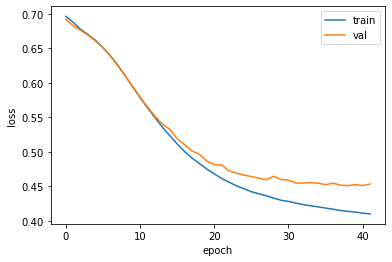

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## Use Word Embedding

In [28]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [29]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 15ms/step - loss: 0.6849 - accuracy: 0.5494 - val_loss: 0.6596 - val_accuracy: 0.6102
Epoch 2/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6227 - accuracy: 0.6683 - val_loss: 0.6018 - val_accuracy: 0.6938
Epoch 3/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5713 - accuracy: 0.7290 - val_loss: 0.5644 - val_accuracy: 0.7360
Epoch 4/100
313/313 [==============================] - 5s 18ms/step - loss: 0.5380 - accuracy: 0.7528 - val_loss: 0.5404 - val_accuracy: 0.7384
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5177 - accuracy: 0.7641 - val_loss: 0.5229 - val_accuracy: 0.7560
Epoch 6/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5038 - accuracy: 0.7727 - val_loss: 0.5139 - val_accuracy: 0.7582
Epoch 7/100
313/313 [==============================] - 6s 18ms/step - loss: 0.4932 - accuracy: 0.7794 - val_loss: 0.5064 - val_accuracy:

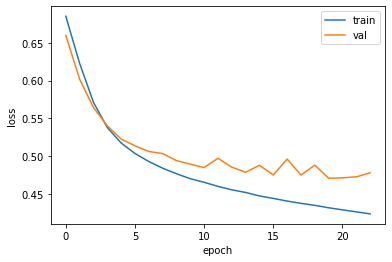

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()